### 모기예보
* 출처 : https://data.seoul.go.kr/dataList/OA-13285/S/1/datasetView.do


* 모기예보 1단계 : 모기 활동 지수 0 ~ 25미만 / 별도의 모기 방제가 필요없음
* 모기예보 2단계 : 모기 활동 지수 25 ~ 50미만 / 문과 방충망 수리, 침입통로 수리 주변 모기 발생원 및 서식처 제거
* 모기예보 3단계 : 모기 활동 지수 50 ~ 75미만 / 고인물 비우기, 모기장 사용, 모기유충 서식처 차단, 야외활동시 모기 퇴치제 사용
* 모기예보 4단계 : 모기 활동 지수 75 ~ / 야외활동 자제 및 모기장 사용, 야외활동시 반드시 퇴치제 및 기피제 사용, 대형모기발생원 보건소에 신고

In [669]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [670]:
import warnings
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)

In [671]:
df = pd.read_csv('./서울시 모기예보제 정보.csv', encoding = 'cp949')
df

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
0,2023-02-14,0.0,0.0,0.0
1,2023-02-13,0.0,0.0,0.0
2,2023-02-12,0.0,0.0,0.0
3,2023-02-11,0.0,0.0,0.0
4,2023-02-10,0.0,0.0,0.0
...,...,...,...,...
5529,1970-01-01,0.0,0.0,0.0
5530,1970-01-01,0.0,0.0,0.0
5531,1970-01-01,0.0,0.0,0.0
5532,1970-01-01,0.0,0.0,0.0


* 2016 ~ 2023년 데이터 > 그 이전 데이터 삭제

In [672]:
df = df[pd.to_datetime(df['모기지수 발생일']).dt.year >= 2016]

In [673]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 0 to 2579
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   모기지수 발생일   2580 non-null   object 
 1   모기지수(수변부)  2568 non-null   float64
 2   모기지수(주거지)  2568 non-null   float64
 3   모기지수(공원)   2568 non-null   float64
dtypes: float64(3), object(1)
memory usage: 100.8+ KB


In [674]:
df.isnull().sum()

모기지수 발생일      0
모기지수(수변부)    12
모기지수(주거지)    12
모기지수(공원)     12
dtype: int64

* 결측치 12개 확인

In [675]:
df[df['모기지수(수변부)'].isnull()]

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
1203,2020-02-17,NaN,NaN,NaN
1773,2018-06-22,NaN,NaN,NaN
1775,2018-06-21,NaN,NaN,NaN
1777,2018-06-20,NaN,NaN,NaN
1780,2018-06-19,NaN,NaN,NaN
1781,2018-06-18,NaN,NaN,NaN
1783,2018-06-17,NaN,NaN,NaN
1785,2018-06-16,NaN,NaN,NaN
1787,2018-06-15,NaN,NaN,NaN
1789,2018-06-14,NaN,NaN,NaN


* 2018 06 14 ~ 2018 06 22 : 기록적인 폭염으로 인한 기록 X

* 모든 결측치가 같은 행에서 나오기 때문에 행 결측치 제거

In [676]:
df.dropna(axis = 0, inplace = True)

In [677]:
df.isnull().sum()

모기지수 발생일     0
모기지수(수변부)    0
모기지수(주거지)    0
모기지수(공원)     0
dtype: int64

In [678]:
df.describe()

,모기지수(수변부),모기지수(주거지),모기지수(공원)
count,2568.000000,2568.000000,2568.000000
mean,157.456231,141.224104,143.502765
std,234.132262,239.978570,239.259921
min,0.000000,-1.200000,-24.300000
25%,5.500000,5.500000,5.500000
50%,57.250000,26.100000,23.400000
75%,139.175000,101.825000,103.175000
max,1000.000000,1000.000000,1000.000000


In [679]:
df['모기지수 발생일'].value_counts()

2021-10-06    3
2018-01-28    2
2020-03-09    2
2020-02-28    2
2020-02-29    2
             ..
2020-11-27    1
2020-11-26    1
2020-11-25    1
2020-11-24    1
2016-05-01    1
Name: 모기지수 발생일, Length: 2436, dtype: int64

In [680]:
df.loc[df['모기지수 발생일'] == '2021-10-06']

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
503,2021-10-06,100.0,48.7,53.1
504,2021-10-06,100.0,48.7,53.1
505,2021-10-06,100.0,48.7,53.1


* 중복 값을 가지고 있기 때문에 중복 제거

In [681]:
# 중복 제거
df.drop_duplicates(inplace = True, keep = 'first' )
# 해당 row의 데이터가 모두 똑같을 때 제거
# df.drop_duplicates(inplace = True, keep = 'first' ,subset = ['모기지수 발생일'])
# 해당 row에서 '모기지수 발생일'이 같으면 나머지 데이터가 달라도 제거 됩니다. '기준'

In [682]:
df.loc[df['모기지수 발생일'] == '2021-10-06']

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
503,2021-10-06,100.0,48.7,53.1


In [683]:
df['모기지수 발생일'].value_counts()

2021-01-29    2
2022-03-16    2
2022-05-05    2
2020-04-25    2
2020-04-26    2
             ..
2020-11-23    1
2020-11-22    1
2020-11-21    1
2020-11-20    1
2016-05-01    1
Name: 모기지수 발생일, Length: 2436, dtype: int64

In [684]:
df.loc[df['모기지수 발생일'] == '2021-01-29'] # 778 제거

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
778,2021-01-29,2.1,-1.2,-24.3
779,2021-01-29,2.1,0.0,0.0


* 모기 지수의 범위 0 ~ 100까지 이기 때문에 음수 값은 삭제

In [685]:
df.loc[df['모기지수 발생일'] == '2022-03-15']

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
340,2022-03-15,71.5,25.5,19.4


In [686]:
df.loc[df['모기지수 발생일'] == '2022-03-16']

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
338,2022-03-16,39.3,13.1,0.6
339,2022-03-16,12.1,0.2,0.0


In [687]:
df.loc[df['모기지수 발생일'] == '2022-03-17']

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
337,2022-03-17,24.9,9.6,0.0


* 주변값과의 비교를 통한 데이터 파악

In [688]:
df.loc[df['모기지수 발생일'] == '2022-05-04']

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
289,2022-05-04,62.6,26.4,17.2


In [689]:
df.loc[df['모기지수 발생일'] == '2022-05-05'] # 288 제거

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
287,2022-05-05,62.6,26.8,17.7
288,2022-05-05,12.1,0.2,0.0


In [690]:
df.loc[df['모기지수 발생일'] == '2022-05-06']

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
286,2022-05-06,67.6,32.0,22.6


In [691]:
df.loc[df['모기지수 발생일'] == '2020-04-24']

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
1069,2020-04-24,36.3,15.0,21.6


In [692]:
df.loc[df['모기지수 발생일'] == '2020-04-25'] # 1068 제거

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
1067,2020-04-25,54.7,22.7,32.7
1068,2020-04-25,36.3,15.0,21.6


In [693]:
df.loc[df['모기지수 발생일'] == '2020-04-26'] # 1065 제거

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
1065,2020-04-26,36.3,15.0,21.6
1066,2020-04-26,60.7,25.1,36.2


In [694]:
df.loc[df['모기지수 발생일'] == '2020-04-27'] # 1064 제거

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
1063,2020-04-27,71.7,29.7,42.8
1064,2020-04-27,36.3,15.0,21.6


In [695]:
df.loc[df['모기지수 발생일'] == '2020-04-28']

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
1061,2020-04-28,68.8,28.5,41.1


In [696]:
# value_counts 2 이상 확인
df['모기지수 발생일'].value_counts().loc[lambda x : x > 1]

2021-01-29    2
2022-03-16    2
2022-05-05    2
2020-04-25    2
2020-04-26    2
2020-04-27    2
Name: 모기지수 발생일, dtype: int64

In [697]:
# 행 제거
df.drop([1064,1065,1068,288,339,778],axis = 0, inplace = True)

In [698]:
df['모기지수 발생일'].value_counts()

2023-02-14    1
2018-07-25    1
2018-08-01    1
2018-07-31    1
2018-07-30    1
             ..
2020-11-24    1
2020-11-23    1
2020-11-22    1
2020-11-21    1
2016-05-01    1
Name: 모기지수 발생일, Length: 2436, dtype: int64

In [699]:
# 인덱스 리셋
df.reset_index(drop = True, inplace = True)

In [700]:
df

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
0,2023-02-14,0.0,0.0,0.0
1,2023-02-13,0.0,0.0,0.0
2,2023-02-12,0.0,0.0,0.0
3,2023-02-11,0.0,0.0,0.0
4,2023-02-10,0.0,0.0,0.0
...,...,...,...,...
2431,2016-05-05,243.8,243.8,243.8
2432,2016-05-04,256.2,256.2,256.2
2433,2016-05-03,304.0,304.0,304.0
2434,2016-05-02,273.5,273.5,273.5


### 모기지수(주거지) 데이터 분석

In [701]:
df['모기지수(주거지)'].describe()

count    2436.000000
mean      144.936617
std       242.249447
min         0.000000
25%         5.500000
50%        29.350000
75%       119.050000
max      1000.000000
Name: 모기지수(주거지), dtype: float64

In [702]:
# to_datetime
df['모기지수 발생일'] = pd.to_datetime(df['모기지수 발생일'])

In [703]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   모기지수 발생일   2436 non-null   datetime64[ns]
 1   모기지수(수변부)  2436 non-null   float64       
 2   모기지수(주거지)  2436 non-null   float64       
 3   모기지수(공원)   2436 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 76.2 KB


<AxesSubplot:>

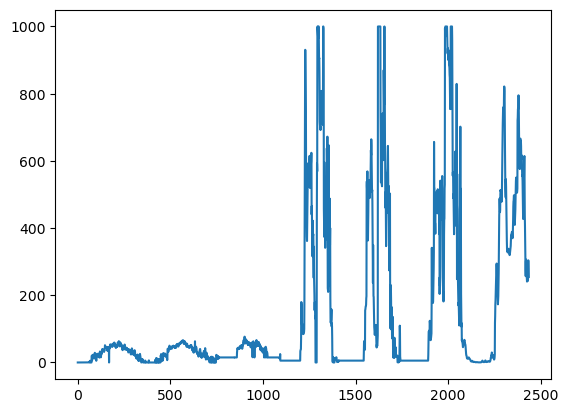

In [704]:
# 2022 ~
df['모기지수(주거지)'].plot()

#### 모기예보제 데이터가 0 ~ 100 까지 범위로 나온건 2021년도 부터
#### 그전에는 0 ~ 1000

In [705]:
# 시계열 데이터
# 시간의 순서에 따라서 수치가 변화하는 데이터
# 데이터를 연도별로 나눈다.
# 연도별로 최대치를 100으로 조정

In [706]:
# 1000이 Max > 100으로
# 100이 안되는 데이터 > 100으로
# > 스케일링

#### min-max : 2-50 사이의 데이터를 0-100 범위로 나누고 싶을 때?
1. 2-50 사이의 데이터에 최소값(2)를 전부 빼서 0-48범위의 데이터를 만듭니다
2. 여기에 최대값(48)로 전부 나눕니다 -> 0-1 범위의 데이터가 됩니다
3. 100을 곱해주면 0-100 범위의 데이터가 탄생

In [707]:
# to_datetime
df['년도'] = pd.to_datetime(df['모기지수 발생일']).dt.year
df['월'] = pd.to_datetime(df['모기지수 발생일']).dt.month

In [708]:
# 2016년도
df_2016 = df.loc[df['년도'] == 2016,['모기지수 발생일', '모기지수(주거지)']]
df_2016.describe()

,모기지수(주거지)
count,242.000000
mean,344.623140
std,239.693056
min,0.900000
25%,145.825000
50%,350.200000
75%,513.200000
max,821.400000


In [709]:
df_2016['모기지수(주거지)'] = (df_2016['모기지수(주거지)'] - df_2016['모기지수(주거지)'].min()) / (df_2016['모기지수(주거지)'].max() - df_2016['모기지수(주거지)'].min()) * 100

In [710]:
df_2016.describe()

,모기지수(주거지)
count,242.000000
mean,41.891912
std,29.213048
min,0.000000
25%,17.663010
50%,42.571603
75%,62.437538
max,100.000000


In [711]:
# 2017년도
df_2017 = df.loc[df['년도'] == 2017,['모기지수 발생일', '모기지수(주거지)']]
df_2017['모기지수(주거지)'] = (df_2017['모기지수(주거지)'] - df_2017['모기지수(주거지)'].min()) / (df_2017['모기지수(주거지)'].max() - df_2017['모기지수(주거지)'].min()) * 100
df_2017.describe()

,모기지수(주거지)
count,361.000000
mean,24.883509
std,31.535053
min,0.000000
25%,0.530106
50%,6.631326
75%,46.399280
max,100.000000


In [712]:
# 2018년도
df_2018 = df.loc[df['년도'] == 2018,['모기지수 발생일', '모기지수(주거지)']]
df_2018['모기지수(주거지)'] = (df_2018['모기지수(주거지)'] - df_2018['모기지수(주거지)'].min()) / (df_2018['모기지수(주거지)'].max() - df_2018['모기지수(주거지)'].min()) * 100
df_2018.describe()

,모기지수(주거지)
count,334.000000
mean,20.987140
std,29.176922
min,0.000000
25%,0.500250
50%,3.106553
75%,45.332666
max,100.000000


In [713]:
# 2019년도
df_2019 = df.loc[df['년도'] == 2019,['모기지수 발생일', '모기지수(주거지)']]
df_2019['모기지수(주거지)'] = (df_2019['모기지수(주거지)'] - df_2019['모기지수(주거지)'].min()) / (df_2019['모기지수(주거지)'].max() - df_2019['모기지수(주거지)'].min()) * 100
df_2019.describe()

,모기지수(주거지)
count,358.000000
mean,22.043324
std,29.728634
min,0.000000
25%,0.550000
50%,0.750000
75%,43.085000
max,100.000000


In [714]:
# 2020년도
df_2020 = df.loc[df['년도'] == 2020,['모기지수 발생일', '모기지수(주거지)']]
df_2020['모기지수(주거지)'] = (df_2020['모기지수(주거지)'] - df_2020['모기지수(주거지)'].min()) / (df_2020['모기지수(주거지)'].max() - df_2020['모기지수(주거지)'].min()) * 100
df_2020.describe()

,모기지수(주거지)
count,366.000000
mean,32.885369
std,27.492425
min,0.000000
25%,13.323983
50%,13.323983
75%,59.537167
max,100.000000


In [715]:
# 2021년도
df_2021 = df.loc[df['년도'] == 2021,['모기지수 발생일', '모기지수(주거지)']]
df_2021['모기지수(주거지)'] = (df_2021['모기지수(주거지)'] - df_2021['모기지수(주거지)'].min()) / (df_2021['모기지수(주거지)'].max() - df_2021['모기지수(주거지)'].min()) * 100
df_2021.describe()

,모기지수(주거지)
count,365.000000
mean,43.790920
std,29.674746
min,0.000000
25%,18.882175
50%,39.879154
75%,70.845921
max,100.000000


In [716]:
# 2022년도
df_2022 = df.loc[df['년도'] == 2022,['모기지수 발생일', '모기지수(주거지)']]
df_2022['모기지수(주거지)'] = (df_2022['모기지수(주거지)'] - df_2022['모기지수(주거지)'].min()) / (df_2022['모기지수(주거지)'].max() - df_2022['모기지수(주거지)'].min()) * 100
df_2022.describe()

,모기지수(주거지)
count,365.000000
mean,41.482082
std,31.769323
min,0.000000
25%,7.840000
50%,42.080000
75%,69.440000
max,100.000000


In [717]:
# 2016 ~ 2022년도 합치기
test = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022], axis = 0)
test.reset_index(drop = True, inplace = True)
test.head()

,모기지수 발생일,모기지수(주거지)
0,2016-12-31,0.000000
1,2016-12-30,0.012188
2,2016-12-29,0.060938
3,2016-12-28,0.158440
4,2016-12-27,0.292505


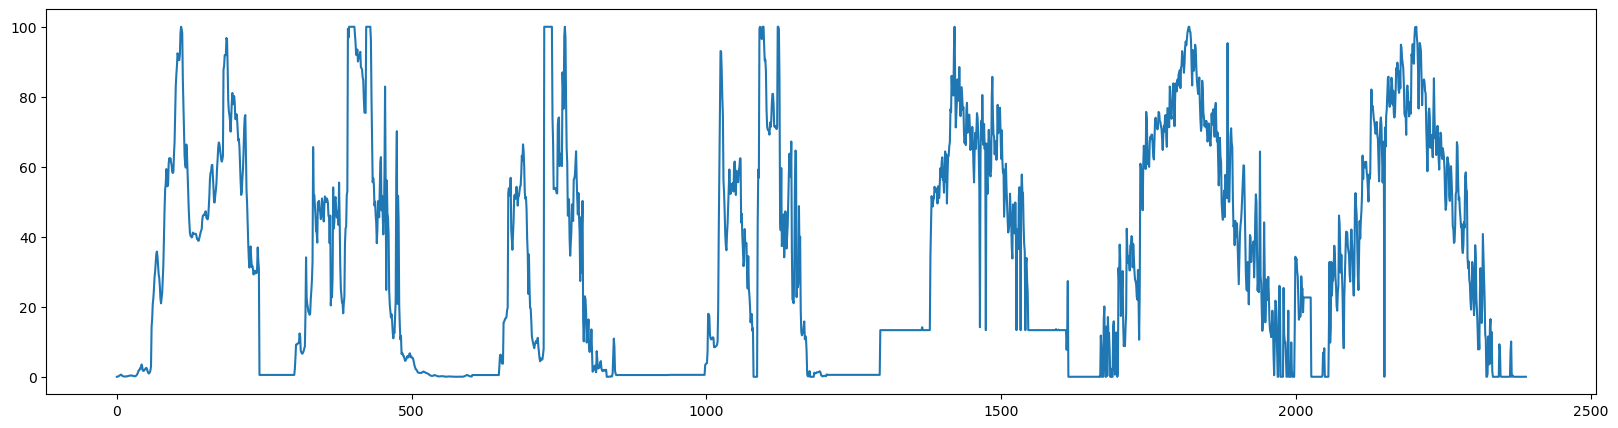

In [718]:
plt.figure(figsize = (20, 5))
plt.plot(test.index, test['모기지수(주거지)'])

In [719]:
test['년도'] = pd.to_datetime(test['모기지수 발생일']).dt.year
test['월'] = pd.to_datetime(test['모기지수 발생일']).dt.month
test['일'] = pd.to_datetime(test['모기지수 발생일']).dt.day
test.head()

,모기지수 발생일,모기지수(주거지),년도,월,일
0,2016-12-31,0.000000,2016,12,31
1,2016-12-30,0.012188,2016,12,30
2,2016-12-29,0.060938,2016,12,29
3,2016-12-28,0.158440,2016,12,28
4,2016-12-27,0.292505,2016,12,27


In [720]:
test[(test['모기지수(주거지)'] == 0)]['월'].value_counts()

1     62
2     53
12    43
4     12
8      8
3      2
11     1
Name: 월, dtype: int64

#### 이상치 제거

In [721]:
test[(test['모기지수(주거지)'] == 0) & (test['월'] == 8)]

,모기지수 발생일,모기지수(주거지),년도,월,일
1080,2019-08-10,0.0,2019,8,10
1081,2019-08-09,0.0,2019,8,9
1082,2019-08-08,0.0,2019,8,8
1083,2019-08-07,0.0,2019,8,7
1084,2019-08-06,0.0,2019,8,6
1085,2019-08-05,0.0,2019,8,5
1086,2019-08-04,0.0,2019,8,4
2150,2022-08-29,0.0,2022,8,29


In [722]:
test[(test['월'] == 8) & (test['일'] == 29 )]

,모기지수 발생일,모기지수(주거지),년도,월,일
121,2016-08-29,53.881779,2016,8,29
365,2017-08-29,22.734547,2017,8,29
696,2018-08-29,39.649825,2018,8,29
1061,2019-08-29,40.020000,2019,8,29
1419,2020-08-29,80.364656,2020,8,29
1785,2021-08-29,71.299094,2021,8,29
2150,2022-08-29,0.000000,2022,8,29


In [723]:
outlier_16 = test[(test['모기지수 발생일'] == '2016-08-28') | (test['모기지수 발생일'] == '2016-08-29') | (test['모기지수 발생일'] == '2016-08-30') | (test['모기지수 발생일'] == '2016-08-31')]
outlier_16.sort_values('일', inplace = True)
outlier_16.reset_index(drop = True, inplace = True)

In [724]:
outlier_17 = test[(test['모기지수 발생일'] == '2017-08-28') | (test['모기지수 발생일'] == '2017-08-29') | (test['모기지수 발생일'] == '2017-08-30') | (test['모기지수 발생일'] == '2017-08-31')]
outlier_17.sort_values('일', inplace = True)
outlier_17.reset_index(drop = True, inplace = True)

In [725]:
outlier_18 =test[(test['모기지수 발생일'] == '2018-08-28') | (test['모기지수 발생일'] == '2018-08-29') | (test['모기지수 발생일'] == '2018-08-30') | (test['모기지수 발생일'] == '2018-08-31')]
outlier_18.sort_values('일', inplace = True)
outlier_18.reset_index(drop = True, inplace = True)

In [726]:
outlier_19 =test[(test['모기지수 발생일'] == '2019-08-28') | (test['모기지수 발생일'] == '2019-08-29') | (test['모기지수 발생일'] == '2019-08-30') | (test['모기지수 발생일'] == '2019-08-31')]
outlier_19.sort_values('일', inplace = True)
outlier_19.reset_index(drop = True, inplace = True)

In [727]:
outlier_20 = test[(test['모기지수 발생일'] == '2020-08-28') | (test['모기지수 발생일'] == '2020-08-29') | (test['모기지수 발생일'] == '2020-08-30') | (test['모기지수 발생일'] == '2020-08-31')]
outlier_20.sort_values('일', inplace = True)
outlier_20.reset_index(drop = True, inplace = True)

In [728]:
outlier_21 =test[(test['모기지수 발생일'] == '2021-08-28') | (test['모기지수 발생일'] == '2021-08-29') | (test['모기지수 발생일'] == '2021-08-30') | (test['모기지수 발생일'] == '2021-08-31')]
outlier_21.sort_values('일', inplace = True)
outlier_21.reset_index(drop = True, inplace = True)

In [729]:
outlier_22 =test[(test['모기지수 발생일'] == '2022-08-28') | (test['모기지수 발생일'] == '2022-08-29') | (test['모기지수 발생일'] == '2022-08-30') | (test['모기지수 발생일'] == '2022-08-31')]
outlier_22.sort_values('일', inplace = True)
outlier_22.reset_index(drop = True, inplace = True)

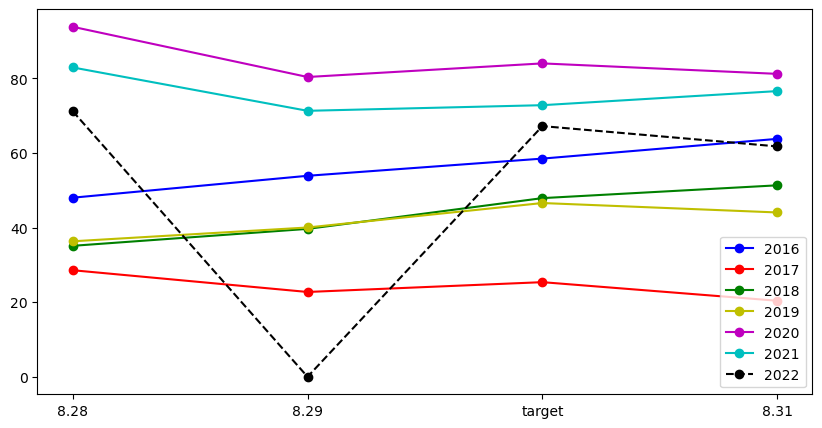

In [730]:
fig, ax = plt.subplots(figsize = (10, 5))

plt.plot(outlier_16.index, outlier_16['모기지수(주거지)'],'bo-',label = '2016')
plt.plot(outlier_17.index, outlier_17['모기지수(주거지)'],'ro-',label = '2017')
plt.plot(outlier_18.index, outlier_18['모기지수(주거지)'],'go-',label = '2018')
plt.plot(outlier_19.index, outlier_19['모기지수(주거지)'],'yo-',label = '2019')
plt.plot(outlier_20.index, outlier_20['모기지수(주거지)'],'mo-',label = '2020')
plt.plot(outlier_21.index, outlier_21['모기지수(주거지)'],'co-',label = '2021')
plt.plot(outlier_22.index, outlier_22['모기지수(주거지)'],'ko--',label = '2022')
ax.set_xticks([0,1,2,3], labels = [08.28,08.29,'target',08.31])
plt.legend()
plt.show()

* 2017년 그래프와 유사하게 변경될 가능성이 있다고 판단

In [731]:
outlier_17

,모기지수 발생일,모기지수(주거지),년도,월,일
0,2017-08-28,28.565713,2017,8,28
1,2017-08-29,22.734547,2017,8,29
2,2017-08-30,25.365073,2017,8,30
3,2017-08-31,20.384077,2017,8,31


* 30 / 31일의 모기지수의 평균치를 대입

In [751]:
outlier_2022_08_29 = outlier_22.loc[outlier_22.index[2:],['모기지수(주거지)']].mean()
outlier_2022_08_29

모기지수(주거지)    64.48
dtype: float64

In [752]:
test.loc[(test['모기지수 발생일'] == '2022-08-29'), ['모기지수(주거지)']] = 64.48

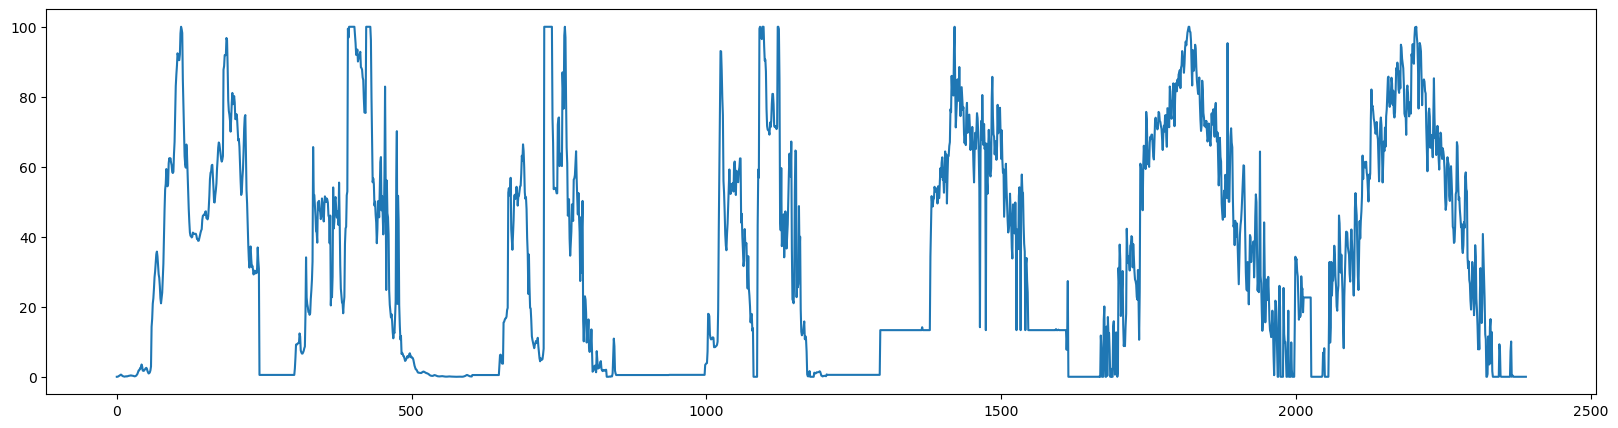

In [753]:
plt.figure(figsize = (20, 5))
plt.plot(test.index, test['모기지수(주거지)'])

In [754]:
test.isnull().sum()

모기지수 발생일     0
모기지수(주거지)    0
년도           0
월            0
일            0
dtype: int64

* 변경 확인

In [755]:
outlier_20_07 = test.loc[(test['년도'] == 2020) & (test['월'] == 7)]
outlier_20_07

,모기지수 발생일,모기지수(주거지),년도,월,일
1448,2020-07-31,64.796634,2020,7,31
1449,2020-07-30,67.321178,2020,7,30
1450,2020-07-29,66.900421,2020,7,29
1451,2020-07-28,71.388499,2020,7,28
1452,2020-07-27,66.900421,2020,7,27
1453,2020-07-26,60.308555,2020,7,26
1454,2020-07-25,55.539972,2020,7,25
1455,2020-07-24,64.656381,2020,7,24
1456,2020-07-23,69.705470,2020,7,23
1457,2020-07-22,65.077139,2020,7,22


* 2020-07-15 : 14.16 / 2020-07-05 : 13.32 > 좌우 평균 대입

In [756]:
outlier_0715= (outlier_20_07.loc[1463]['모기지수(주거지)'] + outlier_20_07.loc[1465]['모기지수(주거지)']) / 2
outlier_0705= (outlier_20_07.loc[1473]['모기지수(주거지)'] + outlier_20_07.loc[1475]['모기지수(주거지)']) / 2

In [757]:
test.loc[(test['모기지수 발생일'] == '2020-07-15'), ['모기지수(주거지)']] = outlier_0715

In [758]:
test.loc[(test['모기지수 발생일'] == '2020-07-05'), ['모기지수(주거지)']] = outlier_0705

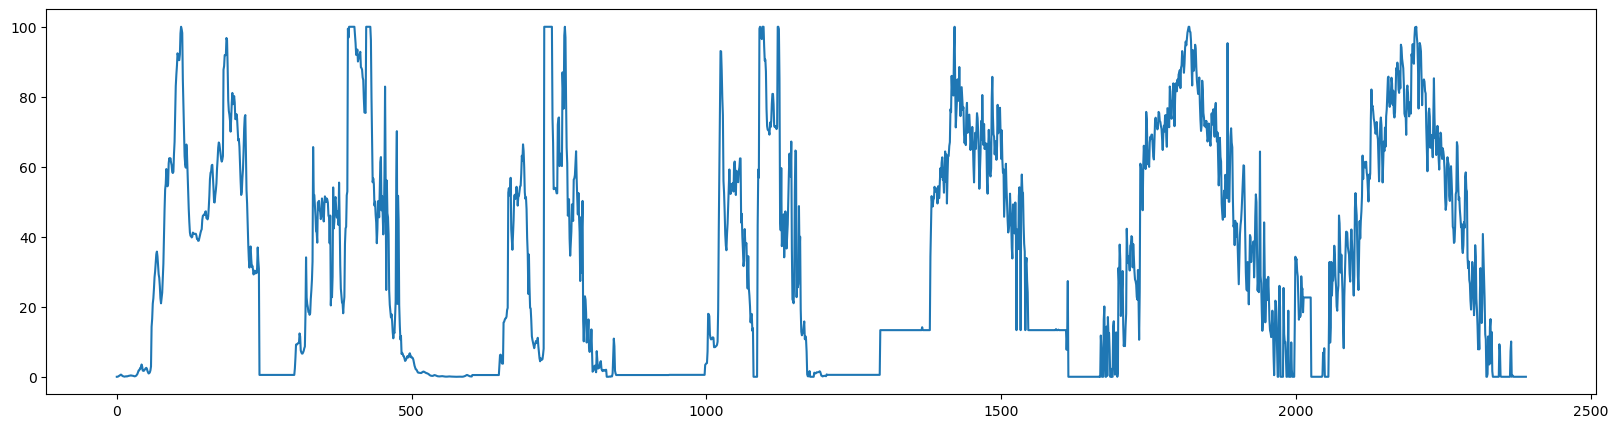

In [759]:
plt.figure(figsize = (20, 5))
plt.plot(test.index, test['모기지수(주거지)'])

In [760]:
test[(test['모기지수(주거지)'] == 0) & (test['월'] == 8)]

,모기지수 발생일,모기지수(주거지),년도,월,일
1080,2019-08-10,0.0,2019,8,10
1081,2019-08-09,0.0,2019,8,9
1082,2019-08-08,0.0,2019,8,8
1083,2019-08-07,0.0,2019,8,7
1084,2019-08-06,0.0,2019,8,6
1085,2019-08-05,0.0,2019,8,5
1086,2019-08-04,0.0,2019,8,4


In [761]:
outlier_19_08 = test.loc[(test['년도'] == 2019) & (test['월'] == 8)]
outlier_19_08

,모기지수 발생일,모기지수(주거지),년도,월,일
1059,2019-08-31,44.05,2019,8,31
1060,2019-08-30,46.58,2019,8,30
1061,2019-08-29,40.02,2019,8,29
1062,2019-08-28,36.32,2019,8,28
1063,2019-08-27,31.61,2019,8,27
1064,2019-08-26,33.12,2019,8,26
1065,2019-08-25,42.20,2019,8,25
1066,2019-08-24,38.00,2019,8,24
1067,2019-08-23,37.83,2019,8,23
1068,2019-08-22,38.17,2019,8,22


In [762]:
outlier_19_08 = test.loc[(test['년도'] == 2019) & (test['월'] == 7)]
outlier_19_08

,모기지수 발생일,모기지수(주거지),년도,월,일
1090,2019-07-31,99.46,2019,7,31
1091,2019-07-30,100.00,2019,7,30
1092,2019-07-29,99.02,2019,7,29
1093,2019-07-28,97.69,2019,7,28
1094,2019-07-27,96.48,2019,7,27
1095,2019-07-26,100.00,2019,7,26
1096,2019-07-25,100.00,2019,7,25
1097,2019-07-24,100.00,2019,7,24
1098,2019-07-23,94.38,2019,7,23
1099,2019-07-22,90.30,2019,7,22


In [763]:
outlier_19_08['모기지수(주거지)'].mean()

82.13967741935483

In [764]:
outlier_20_08 = test.loc[(test['년도'] == 2020) & (test['월'] == 8)]
outlier_20_08

,모기지수 발생일,모기지수(주거지),년도,월,일
1417,2020-08-31,81.206171,2020,8,31
1418,2020-08-30,84.011220,2020,8,30
1419,2020-08-29,80.364656,2020,8,29
1420,2020-08-28,93.828892,2020,8,28
1421,2020-08-27,100.000000,2020,8,27
1422,2020-08-26,83.590463,2020,8,26
1423,2020-08-25,71.248247,2020,8,25
1424,2020-08-24,75.035063,2020,8,24
1425,2020-08-23,79.102384,2020,8,23
1426,2020-08-22,84.992987,2020,8,22


In [765]:
outlier_21_08 = test.loc[(test['년도'] == 2021) & (test['월'] == 8)]
outlier_21_08

,모기지수 발생일,모기지수(주거지),년도,월,일
1783,2021-08-31,76.586103,2021,8,31
1784,2021-08-30,72.809668,2021,8,30
1785,2021-08-29,71.299094,2021,8,29
1786,2021-08-28,82.930514,2021,8,28
1787,2021-08-27,81.419940,2021,8,27
1788,2021-08-26,74.773414,2021,8,26
1789,2021-08-25,73.716012,2021,8,25
1790,2021-08-24,78.851964,2021,8,24
1791,2021-08-23,78.398792,2021,8,23
1792,2021-08-22,83.836858,2021,8,22


* 다른 년도의 8월에 비해 모기지수가 낮으며, 당시 2019년 7월과 8월의 기온이 비슷하지만 7월의 모기지수의 평균이 82.14이지만, 
* 8월은 그 절반 수준 인 것을 봤을 때, 관측 상 문제가 있었을 수 있다는 것을 추론해볼 수 있다.
* 따라서 8월의 결측치에 대해서는 선형함수를 사용하여 결측치를 대입하였다.

In [766]:
test[(test['모기지수(주거지)'] == 0) & (test['월'] == 8)]

,모기지수 발생일,모기지수(주거지),년도,월,일
1080,2019-08-10,0.0,2019,8,10
1081,2019-08-09,0.0,2019,8,9
1082,2019-08-08,0.0,2019,8,8
1083,2019-08-07,0.0,2019,8,7
1084,2019-08-06,0.0,2019,8,6
1085,2019-08-05,0.0,2019,8,5
1086,2019-08-04,0.0,2019,8,4


In [771]:
test.loc[(test['모기지수(주거지)'] == 0) & (test['월'] == 8),['모기지수(주거지)']] = np.nan

In [772]:
outlier_19_08 = test.loc[(test['년도'] == 2019) & (test['월'] == 8)]
outlier_19_08

,모기지수 발생일,모기지수(주거지),년도,월,일
1059,2019-08-31,44.05,2019,8,31
1060,2019-08-30,46.58,2019,8,30
1061,2019-08-29,40.02,2019,8,29
1062,2019-08-28,36.32,2019,8,28
1063,2019-08-27,31.61,2019,8,27
1064,2019-08-26,33.12,2019,8,26
1065,2019-08-25,42.20,2019,8,25
1066,2019-08-24,38.00,2019,8,24
1067,2019-08-23,37.83,2019,8,23
1068,2019-08-22,38.17,2019,8,22


In [773]:
test[test['모기지수(주거지)'].isnull()]

,모기지수 발생일,모기지수(주거지),년도,월,일
1080,2019-08-10,NaN,2019,8,10
1081,2019-08-09,NaN,2019,8,9
1082,2019-08-08,NaN,2019,8,8
1083,2019-08-07,NaN,2019,8,7
1084,2019-08-06,NaN,2019,8,6
1085,2019-08-05,NaN,2019,8,5
1086,2019-08-04,NaN,2019,8,4


In [775]:
test['모기지수(주거지)'] = test['모기지수(주거지)'].fillna(test['모기지수(주거지)'].interpolate()) 

#### 결론(그래프)

In [784]:
test.sort_values('모기지수 발생일', inplace = True)
test.reset_index(drop = True, inplace = True)

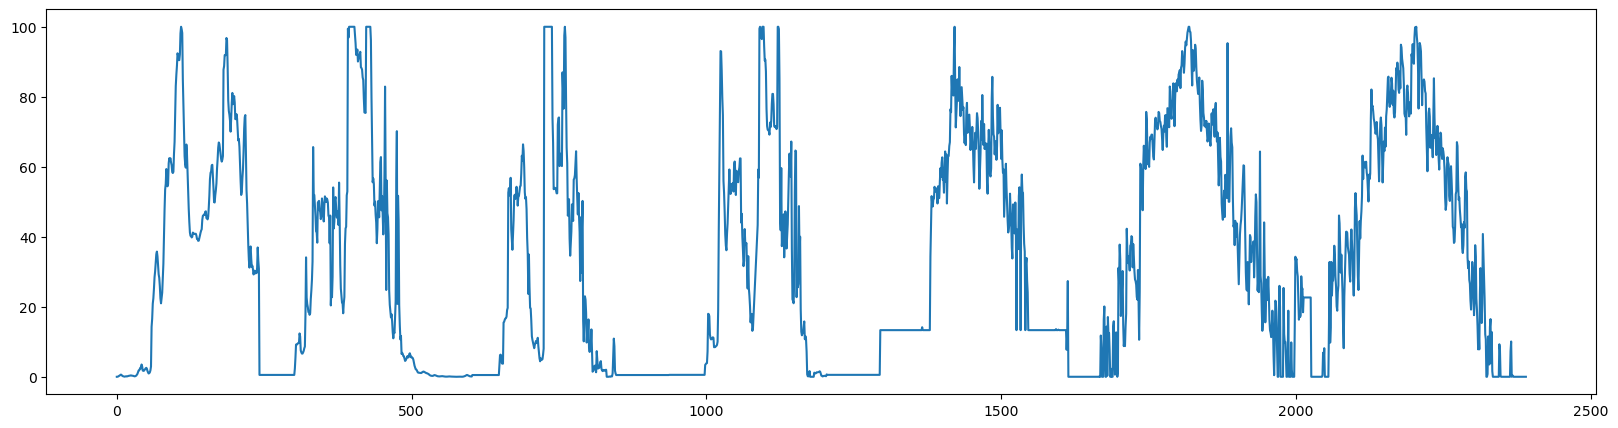

In [783]:
plt.figure(figsize = (20, 5))
plt.plot(test.index, test['모기지수(주거지)'])